# The user approach 
As a start I will use simple heuristics to analyse the population and how different groups are responding to different offers. 

We already started slightly looking at different data distributions etc. in the exploratory analysis. However, here I will go a bit more into the behaviour of different groups. 

In the matrices I built, we have data about the user behaviour. We cannot determine if the user will respond to a specific offer with those data alone. However, we can look into if an offer in general increases spending. And which groups respond best overall. 

To take away the effect of duration of offers, I will use the time values to normalise the spending data. 

We'll start by investigating if gender by itself may influence the response to offers, followed by splitting data into age groups. Later we'll combine the user data and the offer data to look at which groups are responding best to the different offers, and if there are groups that are not really affected by any offers. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
offers = pd.read_pickle('offer_df.pkl')
users = pd.read_pickle('profile_expanded.pkl')

In [3]:
offers.head(2)

,offer_id,user_id,offer_type,difficulty,reward,start_time,duration,end_time,viewed,view_time,completed,complet_time,time_in_window,amount_in_window,type_bogo,type_discount,type_informational
0,2906b810c7d4411798c6938adc9daaa5,68be06ca386d4c31939f3a4f0e3dd783,discount,10,2,168,168,336,1,216.0,0,NaN,121,0.00,0,1,0
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,68be06ca386d4c31939f3a4f0e3dd783,discount,20,5,336,240,576,1,348.0,0,NaN,229,10.52,0,1,0


In [4]:
users.head(2)

,age,became_member_on,gender,income,user_id,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,...,time_in_bogo,time_in_informational,view_ratio,completion_ratio,view_and_complete_ratio,num_offers_received,gender_F,gender_M,gender_O,gender_nan
0,33,2017-04-21,M,72000.0,0009655768c64bdeb2e877511632db8f,127.60,30.73,96.87,0.0,0.0,...,0.0,108.0,0.4,0.6,0.0,5,0,1,0,0
1,118,2018-04-25,None,NaN,00116118485d4dfda04fdbaba9a87b5c,4.09,0.00,4.09,0.0,0.0,...,138.0,0.0,1.0,0.0,0.0,2,0,0,0,1


From the users dataframe we have more columns than what is useful to use in an analysis. The below subset is considered to be useful to answer questions about the users. 

In [5]:
# times = ['time_in_window', 'time_no_window', 'time_in_discount', 'time_in_bogo', 'time_in_informational']
# users.loc[:,times]  = np.array(users.loc[:,times]) +1 
users = users.drop(index=users.loc[users['time_no_window']<0,'user_id'].index)
users.loc[users['gender'].isna(),'gender'] ='N'
users.columns


Index(['age', 'became_member_on', 'gender', 'income', 'user_id', 'spent_total',
       'spent_in_window', 'spent_no_window', 'spent_in_discount',
       'spent_in_bogo', 'spent_in_informational', 'time_in_window',
       'time_no_window', 'time_in_discount', 'time_in_bogo',
       'time_in_informational', 'view_ratio', 'completion_ratio',
       'view_and_complete_ratio', 'num_offers_received', 'gender_F',
       'gender_M', 'gender_O', 'gender_nan'],
      dtype='object')

In [6]:
subset = ['gender', 'age', 'income', 'spent_total', 'spent_in_window', 'spent_no_window', 'spent_in_discount',
       'spent_in_bogo', 'spent_in_informational', 'time_in_window',
       'time_no_window', 'time_in_discount', 'time_in_bogo',
       'time_in_informational', 'view_ratio', 'completion_ratio', 'view_and_complete_ratio']

In [7]:
users_sub = users.loc[:,subset]

users_sub.head(3)

,gender,age,income,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,spent_in_informational,time_in_window,time_no_window,time_in_discount,time_in_bogo,time_in_informational,view_ratio,completion_ratio,view_and_complete_ratio
0,M,33,72000.0,127.60,30.73,96.87,0.00,0.00,30.73,108.0,606.0,0.0,0.0,108.0,0.4,0.6,0.0
1,None,118,NaN,4.09,0.00,4.09,0.00,0.00,0.00,138.0,576.0,0.0,138.0,0.0,1.0,0.0,0.0
2,O,40,57000.0,79.46,33.98,45.48,33.98,22.05,0.00,354.0,360.0,210.0,60.0,144.0,1.0,0.6,0.6


In [8]:
users_sub.describe()

,age,income,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,spent_in_informational,time_in_window,time_no_window,time_in_discount,time_in_bogo,time_in_informational,view_ratio,completion_ratio,view_and_complete_ratio
count,16911.000000,14825.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000
mean,62.239489,65404.991568,104.987994,40.067959,64.920035,17.248089,17.850937,7.909153,228.163207,485.836793,104.742948,101.233635,34.175980,0.692762,0.442738,0.314543
std,26.503506,21598.299410,126.024807,59.745362,98.545746,40.008391,41.224502,26.183562,153.592875,153.592875,126.450228,103.156378,47.884103,0.252338,0.338879,0.282133
min,18.000000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,49000.000000,22.235000,10.910000,6.990000,0.000000,0.000000,0.000000,108.000000,390.000000,0.000000,6.000000,0.000000,0.500000,0.166667,0.000000
50%,58.000000,64000.000000,70.050000,26.770000,32.210000,9.200000,9.870000,0.000000,204.000000,510.000000,54.000000,84.000000,0.000000,0.750000,0.500000,0.250000
75%,73.000000,80000.000000,149.365000,53.310000,93.090000,23.370000,24.450000,3.490000,324.000000,606.000000,168.000000,156.000000,66.000000,1.000000,0.750000,0.500000
max,118.000000,120000.000000,1608.690000,1073.510000,1344.930000,1307.200000,1136.810000,777.470000,804.000000,714.000000,804.000000,636.000000,354.000000,1.000000,1.000000,1.000000


In [9]:
users.loc[users['time_no_window']<0,'user_id']

192      031387fa9cfd47e88f4e4b4b4cb71925
528      085efb39e80140f08b90e0d77299958b
1619     193c5e1694774171aed21630226e1147
1952     1e95b3bc9dd94d5aa14ec531ea948b89
2218     22ff97b3841c460c8cb85aabfe14ae48
2357     2508c99e375a4cdc9832255ec65effd1
3450     34e99d0c0bf242ef8cc4bb601c93fd16
3641     37aafe9fc59444e3b10a36ad9e6eb406
4305     40e6454455f941338a10f99206e0ff0d
5188     4e458fc73b004f6896bafd3f7265d0ce
6665     6543fc9d9aea47d08f64b465df939c76
7617     73614a26789a49daa79dcc26664c1b72
8362     7e8485c281ca423bbd8da3086532f1eb
8813     8548baf4011c4e8b848d19cbe4010cfa
8879     8652c3edf3e84c70b635dbdd4cddd397
10728    a0eb962745114f9f922b67a17940771a
11358    aa85d9108050430886b7cdf7d2f3de1f
11547    ad14d4db50a24792bb6768062340c9e8
11645    ae9c7e677a7c4089a180c98f491fec68
12096    b5a4426b80024f66b21770f8c99b0563
13235    c78c4a78172d4a75b3cf12ae81ec4a21
13391    c9fe2208e4da432898d61a0340743613
13863    d11d07c8dadc4ac7aab8e0871a041104
14404    d9a756caa65a4c8aa18e393cd

From the above summary we can observe a couple of important things. First of all, the min and max values gives indications of obvious outliers or erronous data. However, it look reasonable for most at least. 

Secondly we can observe that the mean and median are very different in some of the parameters. 

In [28]:
idx = pd.IndexSlice
users_sub.groupby(['gender']).describe().transpose().loc[idx[:,idx['mean', '50%']],:]

gender                                   F             M             O
age                     mean     57.544950     52.116690     54.400943
                        50%      58.000000     53.000000     55.000000
income                  mean  71306.412139  61194.601603  63287.735849
                        50%   71000.000000  59000.000000  62000.000000
spent_total             mean    140.919400     99.586381    124.323302
                        50%     116.560000     63.070000     93.440000
spent_in_window         mean     50.671880     38.639815     49.604623
                        50%      38.590000     26.395000     33.685000
spent_no_window         mean     90.247520     60.946566     74.718679
                        50%      68.020000     27.235000     50.150000
spent_in_discount       mean     21.337200     16.458291     22.727075
                        50%      13.630000      8.875000     14.185000
spent_in_bogo           mean     22.245804     17.434843     17.709670
                        50%      15.010000     10.160000     13.115000
spent_in_informational  mean     10.337001      7.554321     12.959245
                        50%       0.000000      0.000000      0.000000
time_in_window          mean    183.881547    226.403819    214.641509
                        50%     156.000000    210.000000    195.000000
time_no_window          mean    530.118453    487.596181    499.358491
                        50%     558.000000    504.000000    519.000000
time_in_discount        mean     79.672051    100.790665     99.396226
                        50%      36.000000     54.000000     42.000000
time_in_bogo            mean     78.285854    103.191655     82.047170
                        50%      48.000000     90.000000     48.000000
time_in_informational   mean     33.596672     33.272277     44.009434
                        50%       0.000000      0.000000     15.000000
view_ratio              mean      0.671912      0.682583      0.778302
                        50%       0.666667      0.666667      0.800000
completion_ratio        mean      0.563436      0.431720      0.549057
                        50%       0.600000      0.400000      0.600000
view_and_complete_ratio mean      0.387801      0.310294      0.434984
                        50%       0.400000      0.250000      0.450000

In the above table we see the mean and the median (50%) for all the users split by gender. N is unknown gender and O is other. One thing to note about the mean and median; If the mean and median is significantly different, it means that a few users are having quite extreme values, driving the mean to change from the mean. 

In the above summary we can see that for all of the spending parameters, the median is significantly lower than the mean. Thus, there are a solid minority doing some serious spending compared to the middle spender. The same is true for the time_in_window which describes the total time a user spend after viewing an offer. 

However, lets drill a bit further. The spending amount is not that interesting as it is now by itself. Every user receives different types of offers, some offers are more common and have longer duration etc. which affect the time the user has to spend their money inside a specific offer. Thus, I will normalise the spendings by dividing by the respective time in window. 

Since the window is defined as from the offer is viewed to the offer is completed or expired, normalising with the time_in_window will also given an extra boost to those responding fast to offers, making it a powerful metric to identify the most eager ones. 

In [11]:
users['spent_in_window_norm'] = users.loc[:,'spent_in_window']/users['time_in_window']
users['spent_no_window_norm'] = users.loc[:,'spent_no_window']/users['time_no_window']
users['spent_in_discount_norm'] = users.loc[:,'spent_in_discount']/users['time_in_discount']
users['spent_in_bogo_norm'] = users.loc[:,'spent_in_bogo']/users['time_in_bogo']
users['spent_in_informational_norm'] = users.loc[:,'spent_in_informational']/users['time_in_informational']
users.head()

,age,became_member_on,gender,income,user_id,spent_total,spent_in_window,spent_no_window,spent_in_discount,spent_in_bogo,...,num_offers_received,gender_F,gender_M,gender_O,gender_nan,spent_in_window_norm,spent_no_window_norm,spent_in_discount_norm,spent_in_bogo_norm,spent_in_informational_norm
0,33,2017-04-21,M,72000.0,0009655768c64bdeb2e877511632db8f,127.60,30.73,96.87,0.00,0.00,...,5,0,1,0,0,0.284537,0.159851,NaN,NaN,0.284537
1,118,2018-04-25,None,NaN,00116118485d4dfda04fdbaba9a87b5c,4.09,0.00,4.09,0.00,0.00,...,2,0,0,0,1,0.000000,0.007101,NaN,0.000000,NaN
2,40,2018-01-09,O,57000.0,0011e0d4e6b944f998e987f904e8c1e5,79.46,33.98,45.48,33.98,22.05,...,5,0,0,1,0,0.095989,0.126333,0.161810,0.367500,0.000000
3,59,2016-03-04,F,90000.0,0020c2b971eb4e9188eac86d93036a77,196.86,34.87,161.99,17.63,17.24,...,5,1,0,0,0,0.276746,0.275493,0.419762,0.205238,NaN
4,24,2016-11-11,F,60000.0,0020ccbbb6d84e358d3414a3ff76cffd,154.05,95.37,58.68,11.65,24.85,...,4,1,0,0,0,0.548103,0.108667,0.215741,0.517708,0.817639


In [12]:
users.columns

Index(['age', 'became_member_on', 'gender', 'income', 'user_id', 'spent_total',
       'spent_in_window', 'spent_no_window', 'spent_in_discount',
       'spent_in_bogo', 'spent_in_informational', 'time_in_window',
       'time_no_window', 'time_in_discount', 'time_in_bogo',
       'time_in_informational', 'view_ratio', 'completion_ratio',
       'view_and_complete_ratio', 'num_offers_received', 'gender_F',
       'gender_M', 'gender_O', 'gender_nan', 'spent_in_window_norm',
       'spent_no_window_norm', 'spent_in_discount_norm', 'spent_in_bogo_norm',
       'spent_in_informational_norm'],
      dtype='object')

In [13]:
users.loc[:,['spent_in_window_norm', 'spent_no_window_norm', 'spent_in_discount_norm', 'spent_in_bogo_norm', 'spent_in_informational_norm']] = users.loc[:,['spent_in_window_norm', 'spent_no_window_norm', 'spent_in_discount_norm', 'spent_in_bogo_norm', 'spent_in_informational_norm']].fillna(0)

In [14]:
users.loc[users['spent_in_window_norm']==np.inf,['time_in_window', 'spent_in_window']]

,time_in_window,spent_in_window
58,0.0,29.20
293,0.0,41.03
300,0.0,11.29
328,0.0,15.95
544,0.0,23.43
651,0.0,29.65
721,0.0,56.09
747,0.0,58.21
912,0.0,55.55
916,0.0,13.05


Create a new subset with our new features

In [15]:
subset2 = ['gender', 'age', 'income', 'spent_total', 'spent_in_window_norm', 'spent_no_window_norm', 'spent_in_discount_norm',
           'spent_in_bogo_norm', 'spent_in_informational_norm', 'view_ratio', 'completion_ratio',
           'view_and_complete_ratio']

In [16]:
users_sub_norm = users.loc[:,subset2]
users_sub_norm.head()

,gender,age,income,spent_total,spent_in_window_norm,spent_no_window_norm,spent_in_discount_norm,spent_in_bogo_norm,spent_in_informational_norm,view_ratio,completion_ratio,view_and_complete_ratio
0,M,33,72000.0,127.60,0.284537,0.159851,0.000000,0.000000,0.284537,0.4,0.60,0.00
1,None,118,NaN,4.09,0.000000,0.007101,0.000000,0.000000,0.000000,1.0,0.00,0.00
2,O,40,57000.0,79.46,0.095989,0.126333,0.161810,0.367500,0.000000,1.0,0.60,0.60
3,F,59,90000.0,196.86,0.276746,0.275493,0.419762,0.205238,0.000000,0.4,0.60,0.40
4,F,24,60000.0,154.05,0.548103,0.108667,0.215741,0.517708,0.817639,1.0,0.75,0.75


With our new subset of the user matrix I would then like to try to create some statistics. First let's see if it makes sense. 

In [17]:
users_sub_norm.describe()

,age,income,spent_total,spent_in_window_norm,spent_no_window_norm,spent_in_discount_norm,spent_in_bogo_norm,spent_in_informational_norm,view_ratio,completion_ratio,view_and_complete_ratio
count,16911.000000,14825.000000,16911.000000,1.691100e+04,16911.000000,1.691100e+04,1.691100e+04,1.691100e+04,16911.000000,16911.000000,16911.000000
mean,62.239489,65404.991568,104.987994,inf,0.117817,inf,inf,inf,0.692762,0.442738,0.314543
std,26.503506,21598.299410,126.024807,NaN,0.170834,NaN,NaN,NaN,0.252338,0.338879,0.282133
min,18.000000,30000.000000,0.000000,0.000000e+00,-1.275000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,45.000000,49000.000000,22.235000,3.783511e-02,0.016946,0.000000e+00,0.000000e+00,0.000000e+00,0.500000,0.166667,0.000000
50%,58.000000,64000.000000,70.050000,1.378922e-01,0.069714,5.015152e-02,6.638889e-02,0.000000e+00,0.750000,0.500000,0.250000
75%,73.000000,80000.000000,149.365000,4.264583e-01,0.169121,3.666171e-01,3.747917e-01,4.979167e-02,1.000000,0.750000,0.500000
max,118.000000,120000.000000,1608.690000,inf,2.869301,inf,inf,inf,1.000000,1.000000,1.000000


In [18]:
idx = pd.IndexSlice
users_sub_norm.groupby(['gender']).describe().transpose().loc[idx[:,idx['mean', '50%']],:]

gender                                       F             M             O
age                         mean  5.754495e+01  5.211669e+01  5.440094e+01
                            50%   5.800000e+01  5.300000e+01  5.500000e+01
income                      mean  7.130641e+04  6.119460e+04  6.328774e+04
                            50%   7.100000e+04  5.900000e+04  6.200000e+04
spent_total                 mean  1.409194e+02  9.958638e+01  1.243233e+02
                            50%   1.165600e+02  6.307000e+01  9.344000e+01
spent_in_window_norm        mean           inf           inf           inf
                            50%   2.876111e-01  1.293740e-01  2.250412e-01
spent_no_window_norm        mean  1.593064e-01  1.125168e-01  1.382956e-01
                            50%   1.272531e-01  6.068654e-02  1.038728e-01
spent_in_discount_norm      mean           inf           inf           inf
                            50%   1.387879e-01  5.261294e-02  1.569081e-01
spent_in_bogo_norm          mean           inf           inf           inf
                            50%   1.585088e-01  7.131007e-02  1.742634e-01
spent_in_informational_norm mean           inf           inf  1.291919e-01
                            50%   0.000000e+00  0.000000e+00  0.000000e+00
view_ratio                  mean  6.719122e-01  6.825829e-01  7.783019e-01
                            50%   6.666667e-01  6.666667e-01  8.000000e-01
completion_ratio            mean  5.634361e-01  4.317205e-01  5.490566e-01
                            50%   6.000000e-01  4.000000e-01  6.000000e-01
view_and_complete_ratio     mean  3.878012e-01  3.102939e-01  4.349843e-01
                            50%   4.000000e-01  2.500000e-01  4.500000e-01

With our normalised parameters we can see even clearer that there are some users that spend much than the rest per hour they spend in a valid window. 

It is also clear to see that the both the mean and median spending in a valid window is almost double that of spendings per hour outside of valid windows. 

Looking at the mean; Women have a much higher spending per hour, both inside and outside the valid windows. The spending per hour is about double for woment than men in the windows. Only "other" can come close. We can also see that the ratio of spending per hour in and out of windows is many times higher for women than any other gender. The numbers are slighly less extreme when we use the median instead, and the jump from out of window to in window is more similar across all genders. However, they are still quite clear indications. 

We can also see that the mean spendings during bogo and discount offers are significantly higher than the informational offers. In fact, at least 50% of the users never spend any money during the period after seeing a informational offer. 

Due to double booking when we have overlapping offers, we cannot compare the values of the offers directly to the ones regarding windows in general.

Further we see that the view ratio is quite similar across genders, with the default users and "other" actually having a higher value. However, this can be for several reasons as the number of users in these groups are relatively small. 

The general completion rate, and the intentional completion rate are both lower for men than for women and significantly lower than "other". 

Let's try to visualise these findings

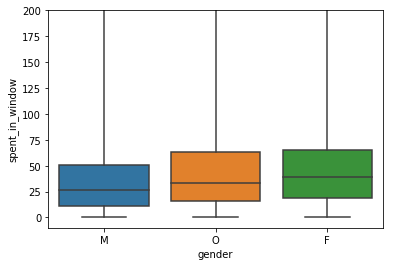

In [19]:
#spent in window broken down
sns.boxplot(x='gender', y='spent_in_window', data=users_sub,whis="range")
plt.savefig('plots/spent_in_window.png')
plt.ylim(-10,200);

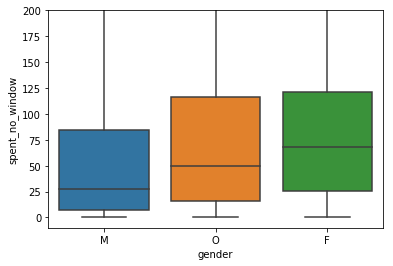

In [20]:
sns.boxplot(x='gender', y='spent_no_window', data=users_sub,whis="range")
plt.savefig('plots/spent_no_window.png')
plt.ylim(-10,200);

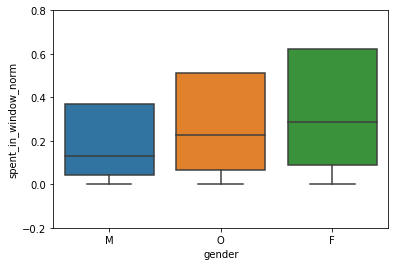

In [21]:
sns.boxplot(x='gender', y='spent_in_window_norm', data=users_sub_norm,whis="range")
plt.savefig('plots/spent_in_window_norm.png')
plt.ylim(-0.2,0.8);

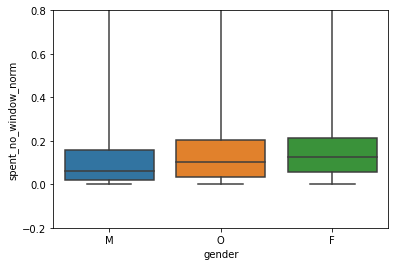

In [22]:
sns.boxplot(x='gender', y='spent_no_window_norm', data=users_sub_norm,whis="range")
plt.savefig('plots/spent_no_window_norm.png')
plt.ylim(-0.2,.8);

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


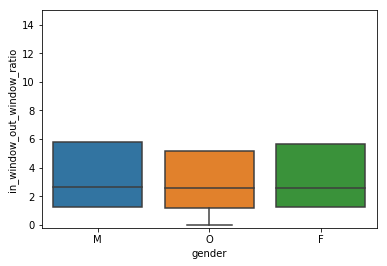

In [23]:
users_sub_norm['in_window_out_window_ratio'] = np.array(users_sub_norm['spent_in_window_norm'])/np.array(users_sub_norm['spent_no_window_norm'])
sns.boxplot(x='gender', y='in_window_out_window_ratio', data=users_sub_norm,whis="range")
plt.savefig('plots/in_window_out_window_ratio.png')
plt.ylim(-0.2,15);

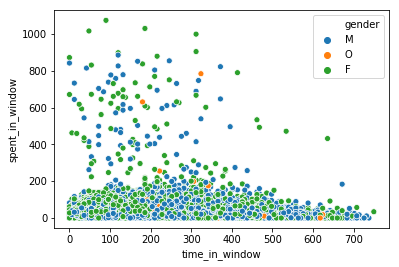

In [24]:
sns.scatterplot(x='time_in_window', y='spent_in_window', hue='gender', data=users_sub)

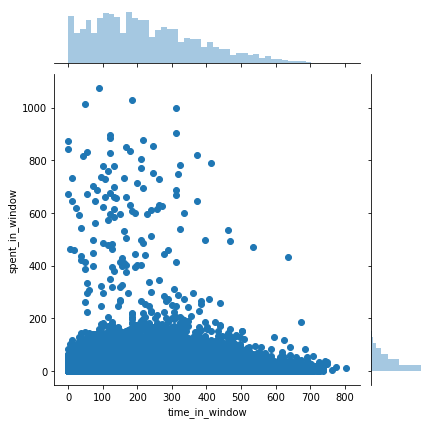

In [25]:
sns.jointplot(x='time_in_window',y='spent_in_window', data= users_sub)

In [26]:
sns.jointplot()

TypeError: jointplot() missing 2 required positional arguments: 'x' and 'y'